In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import all the libraries we'll need

# for numeric calculations
import numpy as np
# for data handling
import pandas as pd
# for plotting charts
import matplotlib.pyplot as plt
# for making plots
import seaborn as sns


In [3]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Datasets/Dataset .csv")


In [5]:
# Take a quick look at the first 25 rows
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [6]:
# Check how many rows and columns into the dataset (rows x columns)
df.shape

(9551, 21)

In [7]:
# Check basic information about the dataset
# This shows how many rows and columns we have, and what type of data is in each column
df.info()

# Check if there are any missing (empty) values in each column
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

,0
Restaurant ID,0
Restaurant Name,0
Country Code,0
City,0
Address,0
Locality,0
Locality Verbose,0
Longitude,0
Latitude,0
Cuisines,9


In [ ]:
# Remove rows where 'Cuisines' column is empty
# We need 'Cuisines' for our analysis, so we drop rows that don't have it

df = df.dropna(subset=['Cuisines'])

In [ ]:
# Reheck the missing (empty) 'Cuisines' coulumn is drop or not

df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [ ]:
# Check all unique values
print(df['Aggregate rating'].unique())

# Make sure all ratings are in number format (not text)
# Sometimes data is stored as string by mistake, so we convert it to numeric
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')


[4.8 4.5 4.4 4.9 4.  4.2 4.3 3.6 4.7 3.  3.8 3.7 3.2 3.1 0.  4.1 3.3 4.6
 3.9 3.4 3.5 2.2 2.9 2.4 2.6 2.8 2.1 2.7 2.5 1.8 2.  2.3 1.9]


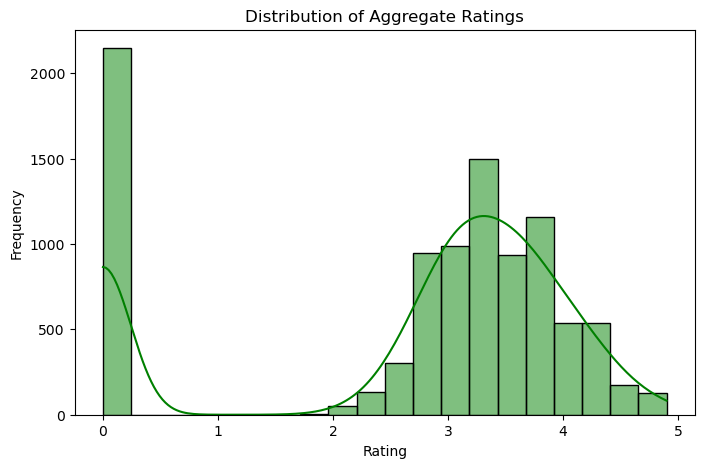

In [ ]:
# Create a graph to see how ratings are spread out
# This shows us how many restaurants got which ratings (like 3 stars, 4 stars, etc.)

plt.figure(figsize=(8,5))
sns.histplot(df['Aggregate rating'], bins=20, kde=True, color='green')

# Add title and labels to the graph
plt.title("Distribution of Aggregate Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()

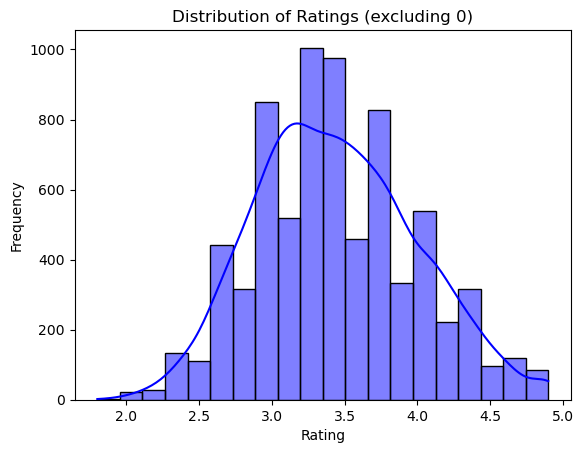

In [ ]:
# Remove restaurants with 0 rating
# Because 0 means no rating, and we want to see only actual customer-rated places
filtered = df[df['Aggregate rating'] > 0]

# Plot a graph to see how ratings are spread (excluding 0s)
# This shows how many restaurants got 1 star, 2 stars, etc.
sns.histplot(filtered['Aggregate rating'], bins=20, kde=True, color='blue')
plt.title("Distribution of Ratings (excluding 0)")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


In [ ]:
# Group ratings into ranges like 0–1, 1–2, etc.
# This helps to count how many restaurants fall into each rating category
bins = [0, 1, 2, 3, 4, 5]
labels = ['0–1', '1–2', '2–3', '3–4', '4–5']
df['Rating Range'] = pd.cut(
    df['Aggregate rating'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Count how many restaurants are in each rating range
rating_range_counts = df['Rating Range'].value_counts().sort_index()
print(rating_range_counts)




Rating Range
0–1    2148
1–2      10
2–3    1891
3–4    4381
4–5    1112
Name: count, dtype: int64


In [ ]:
# Find average number of votes per restaurant
# This shows how many people, on average, rated a restaurant
print("Average number of votes:", df['Votes'].mean())

Average number of votes: 156.7720603647034


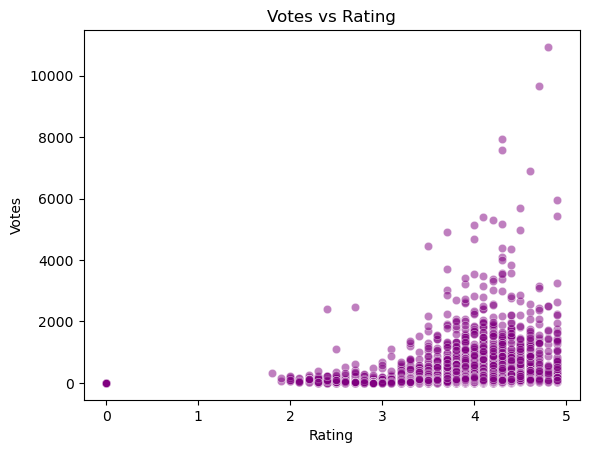

In [ ]:
# Make a scatter plot of votes vs rating
# This shows if restaurants with high rating also get more votes

sns.scatterplot(x='Aggregate rating', y='Votes', data=df, alpha=0.5, color='purple')
plt.title("Votes vs Rating")
plt.xlabel("Rating")
plt.ylabel("Votes")
plt.show()

###  Insights:

- Most restaurants have ratings between **3.0 to 4.0**
- Average number of votes received by restaurants is **157**
- Restaurants with **higher ratings tend to get more votes**, as seen in the scatter plot

###  Conclusion:

- Majority of restaurants perform moderately well in terms of ratings.
- Customer trust and visibility seem to improve as the rating increases.
